In [1]:
import os
os.chdir("..")

In [30]:
import sqlite3

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
conn = sqlite3.connect('data/order_book.db')
cursor = conn.cursor()

In [8]:
data: list[tuple] = cursor.execute("SELECT * FROM ods_order_book;").fetchall()

In [18]:
df = pd.DataFrame(
    data=data,
    columns=['timestamp', 'bid_price', 'bid_volume', 'ask_price', 'ask_volume', 'midprice', 'microprice', 'volume_imbalance', 'volume_imbalance_total', 'spread']
)

df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')
df['return'] = df['midprice'] / df['midprice'].shift(1)
df['return_pct'] = df['midprice'].pct_change()
df['cumulative_return'] = df['return_pct'].cumsum()

df.head()

,timestamp,bid_price,bid_volume,ask_price,ask_volume,midprice,microprice,volume_imbalance,volume_imbalance_total,spread,return,return_pct,cumulative_return
0,2025-02-21 20:31:04.479,2654.5,22678.0,2654.55,39122.0,2654.525,2654.524990,-0.2661,-0.0004,0.05,NaN,NaN,NaN
1,2025-02-21 20:31:04.695,2654.5,23889.0,2654.55,19339.0,2654.525,2654.528288,0.1053,0.1315,0.05,1.0,0.0,0.0
2,2025-02-21 20:31:05.024,2654.5,124808.0,2654.55,17500.0,2654.525,2654.528456,0.7541,0.1382,0.05,1.0,0.0,0.0
3,2025-02-21 20:31:05.355,2654.5,147572.0,2654.55,16900.0,2654.525,2654.529820,0.7945,0.1928,0.05,1.0,0.0,0.0
4,2025-02-21 20:31:05.677,2654.5,147672.0,2654.55,16900.0,2654.525,2654.530124,0.7946,0.2050,0.05,1.0,0.0,0.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   timestamp               100000 non-null  datetime64[ns]
 1   bid_price               100000 non-null  float64       
 2   bid_volume              100000 non-null  float64       
 3   ask_price               100000 non-null  float64       
 4   ask_volume              100000 non-null  float64       
 5   midprice                100000 non-null  float64       
 6   microprice              100000 non-null  float64       
 7   volume_imbalance        100000 non-null  float64       
 8   volume_imbalance_total  100000 non-null  float64       
 9   spread                  100000 non-null  float64       
 10  return                  99999 non-null   float64       
 11  return_pct              99999 non-null   float64       
 12  cumulative_return       99999 n

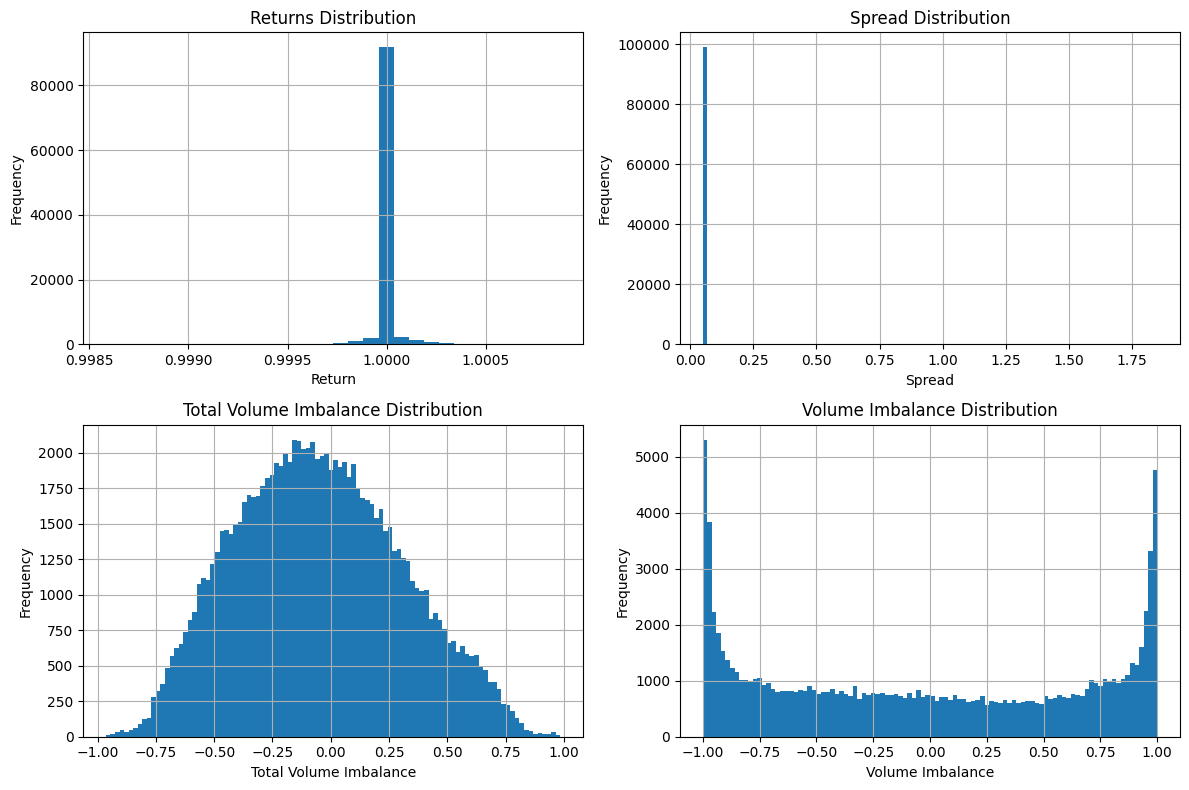

In [47]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Plot returns histogram
df['return'].hist(bins=30, ax=ax1)
ax1.set_title('Returns Distribution')
ax1.set_xlabel('Return')
ax1.set_ylabel('Frequency')

# Plot spread histogram
df['spread'].hist(bins=100, ax=ax2)
ax2.set_title('Spread Distribution')
ax2.set_xlabel('Spread')
ax2.set_ylabel('Frequency')

# Plot total volume imbalance histogram
df['volume_imbalance_total'].hist(bins=100, ax=ax3)
ax3.set_title('Total Volume Imbalance Distribution')
ax3.set_xlabel('Total Volume Imbalance')
ax3.set_ylabel('Frequency')

# Plot volume imbalance histogram
df['volume_imbalance'].hist(bins=100, ax=ax4)
ax4.set_title('Volume Imbalance Distribution')
ax4.set_xlabel('Volume Imbalance')
ax4.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()